<a href="https://colab.research.google.com/github/vaidhyesh1/Machine-Learning-HW/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.colors import ListedColormap

#Initialization of the training, validation and testing datasets
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_train.csv', header = None)
df_train.columns = ['age','year_of_operation','positive_aux_lymph','survival']

df_dev = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_dev.csv', header = None)
df_dev.columns = ['age','year_of_operation','positive_aux_lymph','survival']

df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_test.csv', header = None)
df_test.columns = ['age','year_of_operation','positive_aux_lymph','survival']


In [ ]:
#Counting the number of people who survived after 5 years and people who didn't
print(df_train['survival'].value_counts())


1    173
2     72
Name: survival, dtype: int64


Text(0.5, 0, 'Age')

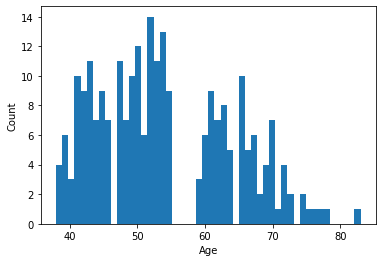

In [ ]:
plt.hist(df_train['age'].to_list(),bins = 50)
plt.ylabel('Count')
plt.xlabel('Age')

Text(0.5, 0, 'year_of_operation')

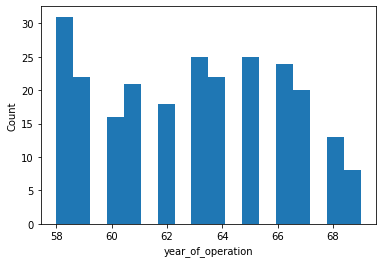

In [ ]:
plt.hist(df_train['year_of_operation'].to_list(),bins = 18)
plt.ylabel('Count')
plt.xlabel('year_of_operation')

Text(0.5, 0, 'positive_aux_lymph')

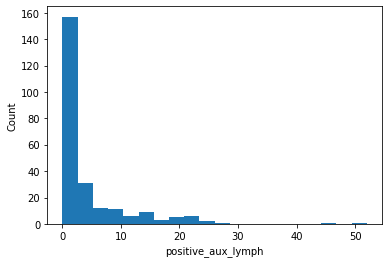

In [ ]:
plt.hist(df_train['positive_aux_lymph'].to_list(),bins = 20)
plt.ylabel('Count')
plt.xlabel('positive_aux_lymph')

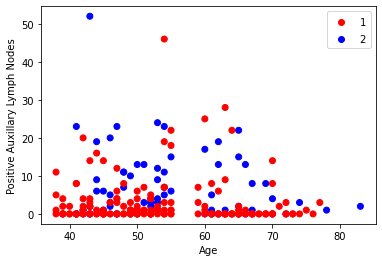

In [ ]:
colors = ListedColormap(['r','b'])

scatter_age_pos = plt.scatter(df_train['age'].to_list(), df_train['positive_aux_lymph'].to_list(), c=df_train['survival'].to_list(),cmap=colors)
plt.xlabel('Age')
plt.ylabel('Positive Auxillary Lymph Nodes')
plt.legend(*scatter_age_pos.legend_elements())


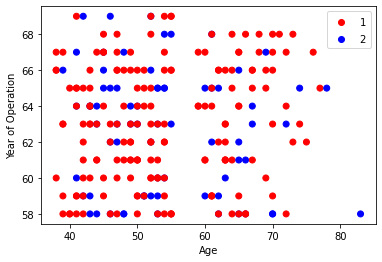

In [ ]:
scatter_age_year_of_op = plt.scatter(df_train['age'].to_list(), df_train['year_of_operation'].to_list(), c=df_train['survival'].to_list(),cmap=colors)
plt.xlabel('Age')
plt.ylabel('Year of Operation')
plt.legend(*scatter_age_year_of_op.legend_elements())

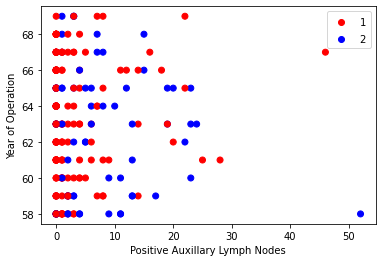

In [ ]:
scatter_pos_aux_year_of_op = plt.scatter(df_train['positive_aux_lymph'].to_list(), df_train['year_of_operation'].to_list(), c=df_train['survival'].to_list(),cmap=colors)
plt.xlabel('Positive Auxillary Lymph Nodes')
plt.ylabel('Year of Operation')
plt.legend(*scatter_pos_aux_year_of_op.legend_elements())

In [ ]:
def euclidianDistance(dataPoint1,dataPoint2):
  diff = dataPoint1 - dataPoint2
  return np.linalg.norm(diff)

def manhattanDistance(dataPoint1,dataPoint2):
  diff = dataPoint1 - dataPoint2
  return diff.abs().sum()

def knn(training_df, test_df, k=3 , distanceAlgo = 'euclidean'):
  accurate = 0
  wrong = 0
  correctFirstClass = 0
  correctSecondClass = 0

  for test_row in test_df.iterrows():
    allDistancesAndSurvival = []
    kBiggestElements = []

    for training_row in training_df.iterrows():
      train_row_wo_survival = training_row[1].drop(labels='survival')
      test_row_wo_survival = test_row[1].drop(labels='survival')
      survival = training_row[1].survival
      if distanceAlgo == 'euclidean':
        distance = euclidianDistance(train_row_wo_survival,test_row_wo_survival)
      elif distanceAlgo == 'manhattan':
        distance = manhattanDistance(train_row_wo_survival,test_row_wo_survival)
      else:
        raise ValueError('Distance algorithm not in the list. Try euclidean or manhattan')
      allDistancesAndSurvival.append((distance, survival))
    
    allDistancesAndSurvival.sort(key = lambda distAndSurvival: distAndSurvival[0])
    kBiggestElements = allDistancesAndSurvival[0:k]
    count = Counter(kBe[1] for kBe in kBiggestElements)
    
    if count[1] > count[2]:
      decision = 1
    else:
      decision = 2

    testSurvival = test_row[1].survival
    if testSurvival == decision:
      accurate = accurate + 1
    else:
      wrong = wrong + 1

    if decision == 1 and testSurvival == decision:
      correctFirstClass = correctFirstClass + 1

    if decision == 2 and testSurvival == decision:
      correctSecondClass = correctSecondClass + 1

  totalFirstClass = test_df['survival'].value_counts()[1]
  totalSecondClass = test_df['survival'].value_counts()[2]

  acc = (accurate/(accurate+wrong))
  bacc = (0.5*(correctFirstClass/totalFirstClass)) + (0.5*(correctSecondClass/totalSecondClass))
  return {'Acc':acc,'b Acc':bacc}

In [ ]:
accuracyK1 = knn(df_train,df_dev,1)
print('Accuracy of k=1 is ',str(accuracyK1))

accuracyK3 = knn(df_train,df_dev,3)
print('Accuracy of k=3 is ',str(accuracyK3))

accuracyK5 = knn(df_train,df_dev,5)
print('Accuracy of k=5 is ',str(accuracyK5))

accuracyK7 = knn(df_train,df_dev,7)
print('Accuracy of k=7 is ',str(accuracyK7))

accuracyK9 = knn(df_train,df_dev,9)
print('Accuracy of k=9 is ',str(accuracyK9))

accuracyK11 = knn(df_train,df_dev,11)
print('Accuracy of k=11 is ',str(accuracyK11))

accuracyK13 = knn(df_train,df_dev,13)
print('Accuracy of k=13 is ',str(accuracyK13))

#accuracyK15 = knn(df_train,df_dev,15)
#print('Accuracy of k=15 is ',str(accuracyK15))

#accuracyK17 = knn(df_train,df_dev,17)
#print('Accuracy of k=17 is ',str(accuracyK17))

#accuracyK19 = knn(df_train,df_dev,19)
#print('Accuracy of k=19 is ',str(accuracyK19))

Accuracy of k=1 is  {'Acc': 0.8666666666666667, 'b Acc': 0.48148148148148145}
Accuracy of k=3 is  {'Acc': 0.8666666666666667, 'b Acc': 0.48148148148148145}
Accuracy of k=5 is  {'Acc': 0.9, 'b Acc': 0.6481481481481481}
Accuracy of k=7 is  {'Acc': 0.8666666666666667, 'b Acc': 0.48148148148148145}
Accuracy of k=9 is  {'Acc': 0.8666666666666667, 'b Acc': 0.48148148148148145}
Accuracy of k=11 is  {'Acc': 0.8666666666666667, 'b Acc': 0.48148148148148145}
Accuracy of k=13 is  {'Acc': 0.8666666666666667, 'b Acc': 0.48148148148148145}
Accuracy of k=15 is  {'Acc': 0.9, 'b Acc': 0.5}
Accuracy of k=17 is  {'Acc': 0.8666666666666667, 'b Acc': 0.48148148148148145}
Accuracy of k=19 is  {'Acc': 0.9, 'b Acc': 0.6481481481481481}


In [ ]:
#Choosing k=5, since we get max accuracy of 90% with k=5
accuracyTestData = knn(df_train,df_test,5)
print('The accuracy of the test is ',str(accuracyTestData))

The accuracy of the test is  {'Acc': 0.8387096774193549, 'b Acc': 0.6466666666666666}


In [ ]:
accuracyK1Manhattan = knn(df_train,df_dev,1,distanceAlgo = 'manhattan')
print('Accuracy of k=1 is ',str(accuracyK1Manhattan))

accuracyK3Manhattan = knn(df_train,df_dev,3,distanceAlgo = 'manhattan')
print('Accuracy of k=3 is ',str(accuracyK3Manhattan))

accuracyK5Manhattan = knn(df_train,df_dev,5,distanceAlgo = 'manhattan')
print('Accuracy of k=5 is ',str(accuracyK5Manhattan))

accuracyK7Manhattan = knn(df_train,df_dev,7,distanceAlgo = 'manhattan')
print('Accuracy of k=7 is ',str(accuracyK7Manhattan))

Accuracy of k=1 is  {'Acc': 0.8666666666666667, 'b Acc': 0.48148148148148145}
Accuracy of k=3 is  {'Acc': 0.8666666666666667, 'b Acc': 0.48148148148148145}
Accuracy of k=5 is  {'Acc': 0.8333333333333334, 'b Acc': 0.46296296296296297}
Accuracy of k=7 is  {'Acc': 0.8666666666666667, 'b Acc': 0.48148148148148145}
